# Data Set Awal

In [8]:
import pandas as pd
import numpy as np

data = pd.DataFrame({
    'age': [25, np.nan, 35, 40, 29, 60, 120],
    'income': [50000, 60000, 55000, np.nan, 45000, 1000000, 30000],
    'gender': ['male', 'female', 'female', np.nan, 'male', 'male', 'female'],
    'signup_date': pd.to_datetime(['2021-01-05', '2021-01-10', '2021-01-12', '2021-02-01', '2021-02-25', '2021-03-10', '2021-03-15'])
})
data

,age,income,gender,signup_date
0,25.0,50000.0,male,2021-01-05
1,NaN,60000.0,female,2021-01-10
2,35.0,55000.0,female,2021-01-12
3,40.0,NaN,NaN,2021-02-01
4,29.0,45000.0,male,2021-02-25
5,60.0,1000000.0,male,2021-03-10
6,120.0,30000.0,female,2021-03-15


# Imputation
* Removing the row with missing values
* Numerical Imputation
* Categorical Imputation



In [2]:
# Numerical imputation
data['age'] = data['age'].fillna(data['age'].median())
data['income'] = data['income'].fillna(data['income'].mean())

# Categorical imputation
most_common_gender = data['gender'].value_counts().idxmax()
data['gender'] = data['gender'].fillna(most_common_gender)
data

,age,income,gender,signup_date
0,25.0,50000.000000,male,2021-01-05
1,37.5,60000.000000,female,2021-01-10
2,35.0,55000.000000,female,2021-01-12
3,40.0,206666.666667,male,2021-02-01
4,29.0,45000.000000,male,2021-02-25
5,60.0,1000000.000000,male,2021-03-10
6,120.0,30000.000000,female,2021-03-15


# Outlier Management
Outliers can skew model predictions  
Techniques include:
* Removal of extreme value
* Transformation using log or Box-Cox methods
* Capping and replacing extreme values


In [3]:
# Hapus outlier pada kolom 'income' berdasarkan standar deviasi
income_mean = data['income'].mean()
income_std = data['income'].std()
data = data[(data['income'] > income_mean - 2 * income_std) & (data['income'] < income_mean + 2 * income_std)]
data

,age,income,gender,signup_date
0,25.0,50000.000000,male,2021-01-05
1,37.5,60000.000000,female,2021-01-10
2,35.0,55000.000000,female,2021-01-12
3,40.0,206666.666667,male,2021-02-01
4,29.0,45000.000000,male,2021-02-25
6,120.0,30000.000000,female,2021-03-15


# One-Hot Encoding for Categorical Data
* Converts categorical variables into numerical values
* Each category gets a separate binary column
* Useful for non-ordinal categorical features


In [4]:
data = pd.get_dummies(data, columns=['gender'], drop_first=True)
data

,age,income,signup_date,gender_male
0,25.0,50000.000000,2021-01-05,True
1,37.5,60000.000000,2021-01-10,False
2,35.0,55000.000000,2021-01-12,False
3,40.0,206666.666667,2021-02-01,True
4,29.0,45000.000000,2021-02-25,True
6,120.0,30000.000000,2021-03-15,False


# Log Transform
* Used to normalize skewed data
* Reduces the impact of large outliers
* Helps models learn better from highly varying data


In [5]:
# Skewed dataset (kebanyakan nilai kecil, sedikit nilai sangat besar)
np.random.seed(42)
income_data = np.concatenate([
    np.random.randint(1000, 5000, 90),     # banyak data kecil
    np.random.randint(10000, 50000, 10)    # sedikit data besar (outlier)
])
data = pd.DataFrame({'income': income_data})

# Log transform (gunakan log + 1 agar tidak error jika ada 0)
data['log_income'] = np.log1p(data['income'])

data

,income,log_income
0,4174,8.336870
1,4507,8.413609
2,1860,7.528869
3,2294,7.738488
4,2130,7.664347
...,...,...
95,19692,9.888019
96,16873,9.733529
97,15675,9.659886
98,10161,9.226411


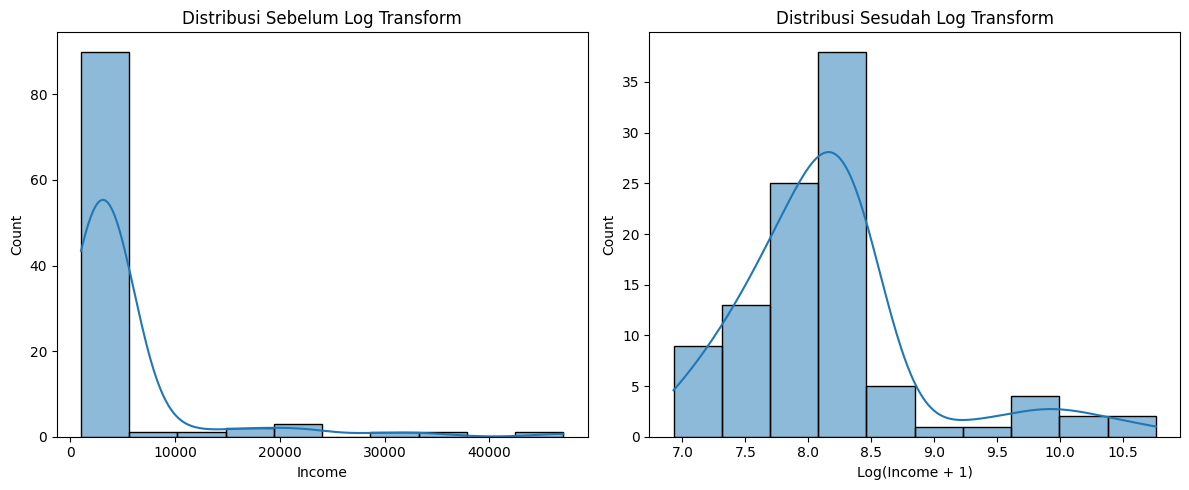

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribusi sebelum log transform
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data['income'], bins=10, kde=True)
plt.title('Distribusi Sebelum Log Transform')
plt.xlabel('Income')

# Plot distribusi sesudah log transform
plt.subplot(1,2,2)
sns.histplot(data['log_income'], bins=10, kde=True)
plt.title('Distribusi Sesudah Log Transform')
plt.xlabel('Log(Income + 1)')

plt.tight_layout()
plt.show()


# Scaling
* Normalization scales values between 0 and 1
* Standardization transforms data to have zero mean and unit variance
* Essential for models sensitive to feature magnitudes


In [9]:
# Normalization
data['age_norm'] = (data['age'] - data['age'].min()) / (data['age'].max() - data['age'].min())

# Standardization
data['age_std'] = (data['age'] - data['age'].mean()) / data['age'].std()

# table with column: before and after scaling
data_scaled = pd.DataFrame({'age_before': data['age'], 'age_norm': data['age_norm'], 'age_std': data['age_std']})
data_scaled

,age_before,age_norm,age_std
0,25.0,0.000000,-0.742003
1,NaN,NaN,NaN
2,35.0,0.105263,-0.462002
3,40.0,0.157895,-0.322001
4,29.0,0.042105,-0.630003
5,60.0,0.368421,0.238001
6,120.0,1.000000,1.918008


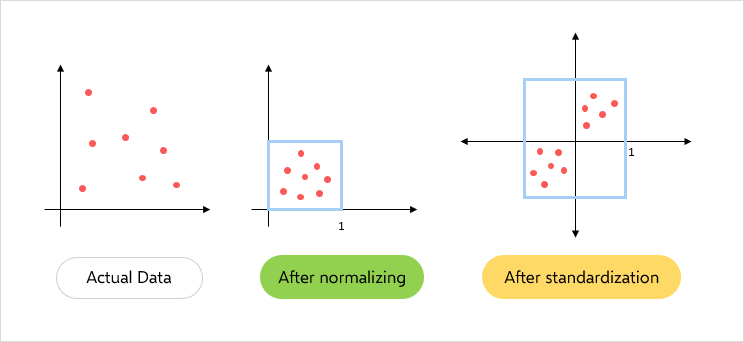

# Feature Extraction & Date Manipulation
Creating new features from existing data  
Examples:
* Extracting year, month, or weekday from date fields
* Creating interaction features by combining multiple fields
* Aggregation of features for better insights


In [10]:
data['signup_day'] = data['signup_date'].dt.day
data['signup_month'] = data['signup_date'].dt.month
data['signup_weekday'] = data['signup_date'].dt.weekday
data['is_weekend'] = data['signup_weekday'].apply(lambda x: 1 if x >= 5 else 0)
data

,age,income,gender,signup_date,age_norm,age_std,signup_day,signup_month,signup_weekday,is_weekend
0,25.0,50000.0,male,2021-01-05,0.000000,-0.742003,5,1,1,0
1,NaN,60000.0,female,2021-01-10,NaN,NaN,10,1,6,1
2,35.0,55000.0,female,2021-01-12,0.105263,-0.462002,12,1,1,0
3,40.0,NaN,NaN,2021-02-01,0.157895,-0.322001,1,2,0,0
4,29.0,45000.0,male,2021-02-25,0.042105,-0.630003,25,2,3,0
5,60.0,1000000.0,male,2021-03-10,0.368421,0.238001,10,3,2,0
6,120.0,30000.0,female,2021-03-15,1.000000,1.918008,15,3,0,0
